# UCLA SETI course<br>Jean-Luc Margot<br>Lecture 8<br>Noise Statistics
The incoming radiation that reaches the radio telescope receiver is a sum of electromagnetic waves, with an electric field that is represented by a normal distribution.  The probability density function (pdf) of the normal distribution is

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$$

In [1]:
from scipy.stats import norm
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np

Use the scipy.stats library to plot the probability density function of the normal distributions with standard deviations of 1, 2, and 5 over the +/-20 range for the x variable.
Label your axes and add a legend and a grid to your plot.

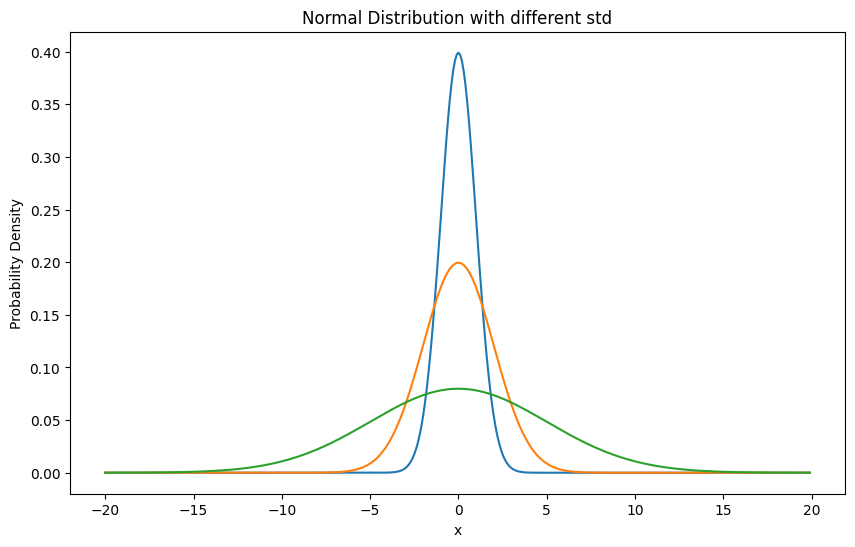

In [11]:
std = [1,2,5]
plt.figure(figsize=(10, 6))

for s in std:
     stats = norm.pdf(np.arange(-20, 20, 0.1), 0, s)
     #grid
     plt.plot(np.arange(-20, 20, 0.1), stats, label=f'std={s}')
     #plt.fill_between(np.arange(-20, 20, 0.1), stats, alpha=0.2)
     plt.title('Normal Distribution with different std')
     plt.xlabel('x')
     plt.ylabel('Probability Density')

The in-phase and quadrature voltages sampled at the receiver are proportional to the electric field and are also normally distributed.  The received power is the sum of the squares of the in-phase and quadrature voltages.  The distribution that represents the sum of the squares of two independent standard normal random variables is the chi-squared distribution with 2 degrees of freedom.

Use the scipy.stats library to plot the probability density function of the chi-squared distributions with degrees of freedom values of 2, 10, and 25 over the 0-50 range for the x variable. Label your axes and add a legend and a grid to your plot.

[-5.00000000e+01 -4.99000000e+01 -4.98000000e+01 -4.97000000e+01
 -4.96000000e+01 -4.95000000e+01 -4.94000000e+01 -4.93000000e+01
 -4.92000000e+01 -4.91000000e+01 -4.90000000e+01 -4.89000000e+01
 -4.88000000e+01 -4.87000000e+01 -4.86000000e+01 -4.85000000e+01
 -4.84000000e+01 -4.83000000e+01 -4.82000000e+01 -4.81000000e+01
 -4.80000000e+01 -4.79000000e+01 -4.78000000e+01 -4.77000000e+01
 -4.76000000e+01 -4.75000000e+01 -4.74000000e+01 -4.73000000e+01
 -4.72000000e+01 -4.71000000e+01 -4.70000000e+01 -4.69000000e+01
 -4.68000000e+01 -4.67000000e+01 -4.66000000e+01 -4.65000000e+01
 -4.64000000e+01 -4.63000000e+01 -4.62000000e+01 -4.61000000e+01
 -4.60000000e+01 -4.59000000e+01 -4.58000000e+01 -4.57000000e+01
 -4.56000000e+01 -4.55000000e+01 -4.54000000e+01 -4.53000000e+01
 -4.52000000e+01 -4.51000000e+01 -4.50000000e+01 -4.49000000e+01
 -4.48000000e+01 -4.47000000e+01 -4.46000000e+01 -4.45000000e+01
 -4.44000000e+01 -4.43000000e+01 -4.42000000e+01 -4.41000000e+01
 -4.40000000e+01 -4.39000

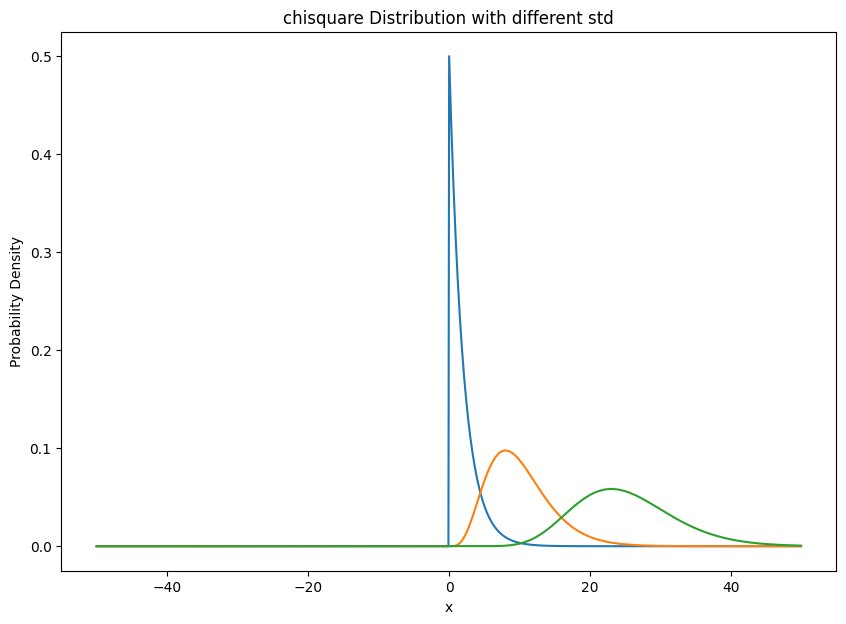

In [21]:
df = [2,10,25]

plt.figure(figsize=(10, 7))

x = np.arange(-50, 50, 0.1)

print(x)
for s in df:
     stats = chi2.pdf(x, s)
     #grid
     plt.plot(x, stats, label=f'std={s}')
     #plt.fill_between(np.arange(-20, 20, 0.1), stats, alpha=0.2)
     plt.title('chisquare Distribution with different std')
     plt.xlabel('x')
     plt.ylabel('Probability Density')


The mean and variance of a chi-squared distribution with k degrees of freedom is k and 2k, respectively.  In our integration, we typically sum hundreds of independent power spectra.  The distribution of the noise approaches the normal distribution to a very good approximation by the  central limit theorem.

Use the scipy.stats library to plot the probability density functions of the chi-squared distributions with 400 degrees of freedom and the corresponding normal distribution over the 0-800 range for the x variable. Label your axes and add a legend and a grid to your plot.

Text(0, 0.5, 'Probability Density')

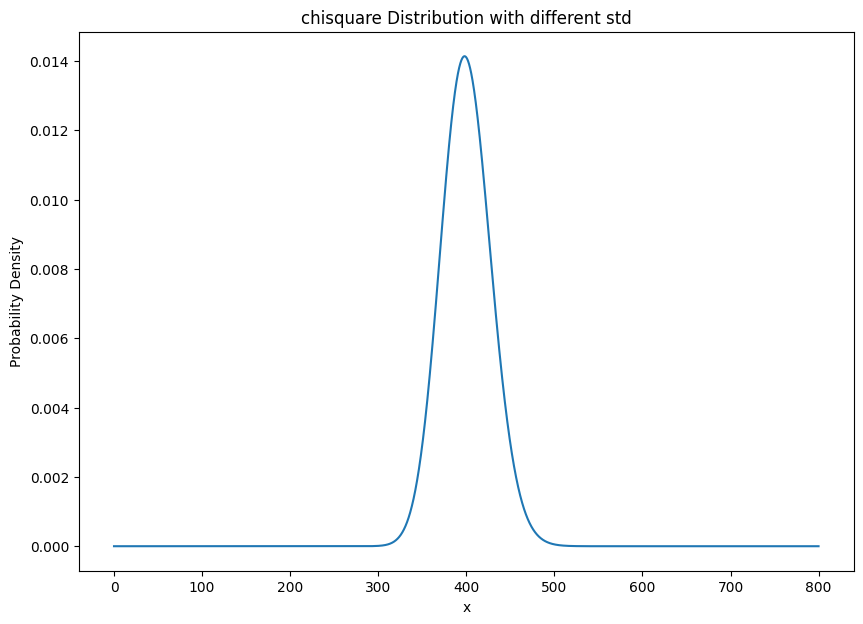

In [2]:
df = 400
x = np.arange(0, 800, 0.1)

stats = chi2.pdf(x,df)

plt.figure(figsize=(10, 7))

plt.plot(x, stats, label=f'std={df}')
plt.title('chisquare Distribution with different std')
plt.xlabel('x')
plt.ylabel('Probability Density')


For ease of interpretation, we subtract the mean power in our spectra and scale the values by the standard deviation of the noise.  The subtraction explains why our power spectra include negative values.   The resultant distribution approaches the [standard normal distribution N(0,1)](https://en.wikipedia.org/wiki/Standard_normal_table) and the scaled values represent the $Z$ score:

$$Z = \frac{X-\mu}{\sigma}$$

As described in the context of the radiometer equation (Lecture 1), radio astronomers typically expect a signal to exceed the standard deviation of the noise by a factor of 5 to qualify as a detection.  What is the probability of reaching this threshold ($Z \geq 5$) purely by chance?  The answer is provided by the complement of the cumulative distribution function (cdf).  The cdf of a random variable X, evaluated at x, is the probability that X will take a value less than or equal to x.

Use the scipy.stats library to plot the probability density functions of the standard normal distribution over the +/-10 range for the Z variable. Use a logarithmic scale for the y axis.  Label your axes and add a legend and a grid to your plot.  Then, compute and print the probability of a 5-sigma detection by chance alone by using the cumulative distribution function.  You may highlight the region under the curve that corresponds to Z>5 with the fill_between() method of matplotlib.  

In our SETI work, we label signals with integrated power $Z \geq 10$ as detections.  The probability of such detections occuring by chance alone is $\ll10^{-16}$.  Because the overwhelming majority of detections are due to anthropogenic radio frequency interference (RFI), all detections are initially referred to as candidate signals.